In [43]:
import numpy as np
import pandas as pd

In [44]:
#train 有35156筆資料，test 有34844筆資料。
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#'test.csv'的 Weather 欄位用 0 補起來。
df_test['Weather'] = np.zeros((len(df_test),))

In [45]:
#Date、Loc、WindDir、DayWindDir、NightWindDir are categorical features

#drop Date
df.drop('Date', axis=1, inplace=True)
df_test.drop('Date', axis=1, inplace=True)

#encode Loc、WindDir、DayWindDir、NightWindDir with LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Loc'] = le.fit_transform(df['Loc'])
df['WindDir'] = le.fit_transform(df['WindDir'])
df['DayWindDir'] = le.fit_transform(df['DayWindDir'])
df['NightWindDir'] = le.fit_transform(df['NightWindDir'])

df_test['Loc'] = le.fit_transform(df_test['Loc'])
df_test['WindDir'] = le.fit_transform(df_test['WindDir'])
df_test['DayWindDir'] = le.fit_transform(df_test['DayWindDir'])
df_test['NightWindDir'] = le.fit_transform(df_test['NightWindDir'])

#replace NaN with mode for Loc、WindDir、DayWindDir、NightWindDir
df['Loc'].fillna(df['Loc'].mode()[0], inplace=True)
df['WindDir'].fillna(df['WindDir'].mode()[0], inplace=True)
df['DayWindDir'].fillna(df['DayWindDir'].mode()[0], inplace=True)
df['NightWindDir'].fillna(df['NightWindDir'].mode()[0], inplace=True)

df_test['Loc'].fillna(df_test['Loc'].mode()[0], inplace=True)
df_test['WindDir'].fillna(df_test['WindDir'].mode()[0], inplace=True)
df_test['DayWindDir'].fillna(df_test['DayWindDir'].mode()[0], inplace=True)
df_test['NightWindDir'].fillna(df_test['NightWindDir'].mode()[0], inplace=True)

#encode Loc、WindDir、DayWindDir、NightWindDir with one-hot encoding
df = pd.get_dummies(df, columns=['Loc', 'WindDir', 'DayWindDir', 'NightWindDir'])
df_test = pd.get_dummies(df_test, columns=['Loc', 'WindDir', 'DayWindDir', 'NightWindDir'])

In [46]:
#check missing value in each column
for col in df.columns:
    print(col, df[col].isnull().sum())

TempLow 7067
TempHigh 6892
Steaming 7014
Sun 7063
WindSpeed 7008
DayWindSpeed 7036
NightWindSpeed 7013
DayHumidity 7028
NightHumidity 7092
DayPressure 7038
NightPressure 7096
DayCloud 7029
NightCloud 6948
DayTemp 7064
NightTemp 7005
Weather 0
RISK_MM 6945
Loc_0 0
Loc_1 0
Loc_2 0
Loc_3 0
Loc_4 0
Loc_5 0
Loc_6 0
Loc_7 0
Loc_8 0
Loc_9 0
Loc_10 0
Loc_11 0
Loc_12 0
Loc_13 0
Loc_14 0
Loc_15 0
Loc_16 0
Loc_17 0
Loc_18 0
Loc_19 0
Loc_20 0
Loc_21 0
Loc_22 0
Loc_23 0
Loc_24 0
Loc_25 0
Loc_26 0
Loc_27 0
Loc_28 0
Loc_29 0
Loc_30 0
Loc_31 0
Loc_32 0
Loc_33 0
Loc_34 0
Loc_35 0
Loc_36 0
Loc_37 0
Loc_38 0
Loc_39 0
Loc_40 0
Loc_41 0
Loc_42 0
Loc_43 0
Loc_44 0
Loc_45 0
Loc_46 0
Loc_47 0
Loc_48 0
Loc_49 0
WindDir_0 0
WindDir_1 0
WindDir_2 0
WindDir_3 0
WindDir_4 0
WindDir_5 0
WindDir_6 0
WindDir_7 0
WindDir_8 0
WindDir_9 0
WindDir_10 0
WindDir_11 0
WindDir_12 0
WindDir_13 0
WindDir_14 0
WindDir_15 0
WindDir_16 0
DayWindDir_0 0
DayWindDir_1 0
DayWindDir_2 0
DayWindDir_3 0
DayWindDir_4 0
DayWindDir_5 0
Day

In [47]:
#replace missing value with median for all columns except 'Loc'、'WindDir'、'DayWindDir'、'NightWindDir'
for col in df.columns:
    df[col].fillna(df[col].median(), inplace=True)
    df_test[col].fillna(df_test[col].median(), inplace=True)

In [48]:
#check missing value in each column
for col in df.columns:
    if  df[col].isnull().sum() != 0:
        print(col, df[col].isnull().sum())

In [49]:
#Normalization only TempLow、TempHigh、Steaming、Sun、WindSpeed、DayWindSpeed、NightWindSpeed、
#DayHumidity、NightHumidity、DayPressure、NightPressure、DayCloud、NightHumidity、DayPressure、
#NightPressure、DayCloud、NightCloud、DayTemp、NightTemp、RISK_MM
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['TempLow'] = scaler.fit_transform(df['TempLow'].values.reshape(-1,1))
df['TempHigh'] = scaler.fit_transform(df['TempHigh'].values.reshape(-1,1))
df['Steaming'] = scaler.fit_transform(df['Steaming'].values.reshape(-1,1))
df['Sun'] = scaler.fit_transform(df['Sun'].values.reshape(-1,1))
df['WindSpeed'] = scaler.fit_transform(df['WindSpeed'].values.reshape(-1,1))
df['DayWindSpeed'] = scaler.fit_transform(df['DayWindSpeed'].values.reshape(-1,1))
df['NightWindSpeed'] = scaler.fit_transform(df['NightWindSpeed'].values.reshape(-1,1))
df['DayHumidity'] = scaler.fit_transform(df['DayHumidity'].values.reshape(-1,1))
df['NightHumidity'] = scaler.fit_transform(df['NightHumidity'].values.reshape(-1,1))
df['DayPressure'] = scaler.fit_transform(df['DayPressure'].values.reshape(-1,1))
df['NightPressure'] = scaler.fit_transform(df['NightPressure'].values.reshape(-1,1))
df['DayCloud'] = scaler.fit_transform(df['DayCloud'].values.reshape(-1,1))
df['NightCloud'] = scaler.fit_transform(df['NightCloud'].values.reshape(-1,1))
df['DayTemp'] = scaler.fit_transform(df['DayTemp'].values.reshape(-1,1))
df['NightTemp'] = scaler.fit_transform(df['NightTemp'].values.reshape(-1,1))
df['RISK_MM'] = scaler.fit_transform(df['RISK_MM'].values.reshape(-1,1))

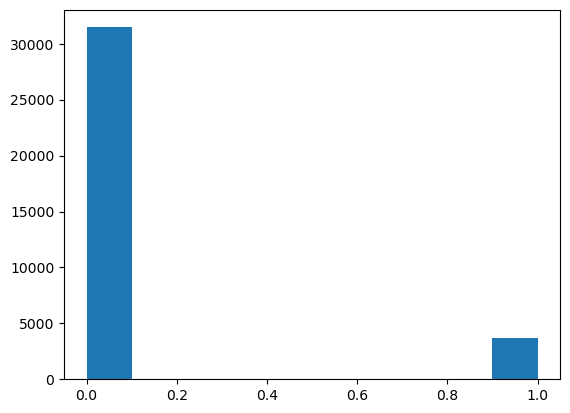

In [50]:
#plt the distribution of weather in train data
import matplotlib.pyplot as plt
plt.hist(df['Weather'])
plt.show()

In [51]:
#make the training data balanced with SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(df.drop('Weather', axis=1), df['Weather'])

(array([31472.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 31472.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

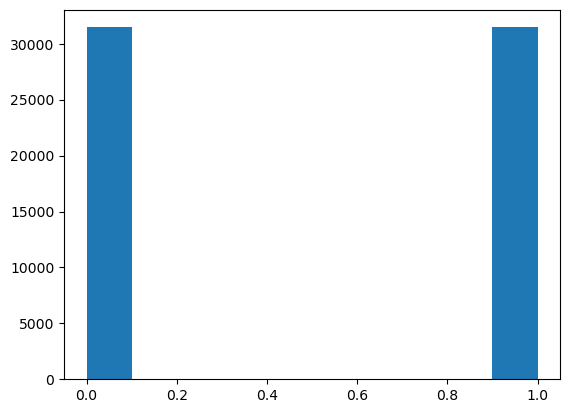

In [52]:
#check if the training data is balanced
plt.hist(y_res)

# train

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

df_test = df_test.drop(['Weather'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [54]:
# from sklearn.ensemble import RandomForestClassifier

# RF = RandomForestClassifier()
# RF.fit(X_train, y_train)
# y_pred_rf = RF.predict(X_test)

# print('RF accuracy:', accuracy_score(y_test, y_pred_rf))
# print('RF f1 score:', f1_score(y_test, y_pred_rf))

# #plt ROC curve
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

In [55]:
# #use cross validation to check the f1 score of the model of x_test
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(RF, X_test, y_test, cv=5, scoring='f1_macro')
# print(scores)

In [56]:
# from sklearn.linear_model import LogisticRegression

# LR = LogisticRegression()
# LR.fit(X_train, y_train)
# y_pred_lr = LR.predict(X_test)

# print('LR accuracy:', accuracy_score(y_test, y_pred_lr))
# print('LR f1 score:', f1_score(y_test, y_pred_lr))

# #plt ROC curve
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

In [57]:
# from sklearn.neighbors import KNeighborsClassifier

# KN = KNeighborsClassifier()
# KN.fit(X_train, y_train)
# y_pred_kn = KN.predict(X_test)
# print('KN accuracy:', accuracy_score(y_test, y_pred_kn))
# print('KN f1 score:', f1_score(y_test, y_pred_kn))

# #plt ROC curve
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_kn)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

In [58]:
# from sklearn.naive_bayes import GaussianNB

# GNB = GaussianNB()
# GNB.fit(X_train, y_train)
# y_pred_gnb = GNB.predict(X_test)
# print('GNB accuracy:', accuracy_score(y_test, y_pred_gnb))
# print('GNB f1 score:', f1_score(y_test, y_pred_gnb))

# #plt ROC curve
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_gnb)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

In [59]:
# from sklearn.svm import SVC

# svc = SVC()
# svc.fit(X_train, y_train)
# y_pred_svc = svc.predict(X_test)

# print('SVC accuracy:', accuracy_score(y_test, y_pred_svc))
# #plt AOC curve
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

In [60]:
#use lightgbm to predict
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round = 250,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Start predicting...')
# predict
y_pred_lgb = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred_binary = (y_pred_lgb > 0.5).astype(int)
# eval
print('The roc of prediction is:', roc_auc_score(y_test, y_pred_binary))
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred_binary))
print('The f1 score of prediction is:', f1_score(y_test, y_pred_binary))

Start training...


'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's binary_logloss: 0.670595	valid_0's auc: 0.882807
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.649837	valid_0's auc: 0.906016
[3]	valid_0's binary_logloss: 0.630848	valid_0's auc: 0.905697
[4]	valid_0's binary_logloss: 0.617222	valid_0's auc: 0.917315
[5]	valid_0's binary_logloss: 0.599857	valid_0's auc: 0.919602
[6]	valid_0's binary_logloss: 0.584051	valid_0's auc: 0.919159
[7]	valid_0's binary_logloss: 0.569693	valid_0's auc: 0.919006
[8]	valid_0's binary_logloss: 0.55656	valid_0's auc: 0.918476
[9]	valid_0's binary_logloss: 0.544117	valid_0's auc: 0.918534
[10]	valid_0's binary_logloss: 0.532383	valid_0's auc: 0.919332
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.599857	valid_0's auc: 0.919602
Start predicting...
The roc of prediction is: 0

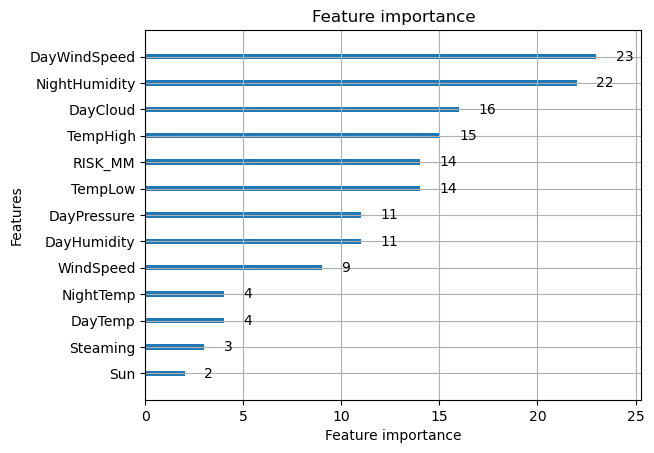

TempLow : 14
TempHigh : 15
Steaming : 3
Sun : 2
WindSpeed : 9
DayWindSpeed : 23
NightWindSpeed : 0
DayHumidity : 11
NightHumidity : 22
DayPressure : 11
NightPressure : 0
DayCloud : 16
NightCloud : 1
DayTemp : 4
NightTemp : 4
RISK_MM : 14
Loc_0 : 0
Loc_1 : 0
Loc_2 : 0
Loc_3 : 0
Loc_4 : 0
Loc_5 : 0
Loc_6 : 0
Loc_7 : 0
Loc_8 : 0
Loc_9 : 0
Loc_10 : 0
Loc_11 : 0
Loc_12 : 0
Loc_13 : 0
Loc_14 : 0
Loc_15 : 0
Loc_16 : 0
Loc_17 : 0
Loc_18 : 0
Loc_19 : 0
Loc_20 : 0
Loc_21 : 0
Loc_22 : 0
Loc_23 : 0
Loc_24 : 0
Loc_25 : 0
Loc_26 : 0
Loc_27 : 0
Loc_28 : 0
Loc_29 : 0
Loc_30 : 0
Loc_31 : 0
Loc_32 : 0
Loc_33 : 0
Loc_34 : 0
Loc_35 : 0
Loc_36 : 0
Loc_37 : 0
Loc_38 : 0
Loc_39 : 0
Loc_40 : 0
Loc_41 : 0
Loc_42 : 0
Loc_43 : 0
Loc_44 : 0
Loc_45 : 0
Loc_46 : 0
Loc_47 : 0
Loc_48 : 0
Loc_49 : 0
WindDir_0 : 0
WindDir_1 : 0
WindDir_2 : 0
WindDir_3 : 0
WindDir_4 : 0
WindDir_5 : 0
WindDir_6 : 0
WindDir_7 : 0
WindDir_8 : 0
WindDir_9 : 0
WindDir_10 : 0
WindDir_11 : 0
WindDir_12 : 0
WindDir_13 : 0
WindDir_14 : 0
WindDir

In [61]:
# plot feature importance
lgb.plot_importance(gbm, max_num_features=13)
plt.show()

# print feature importance in table form
feature_importance = list(gbm.feature_importance())
feature_names = list(gbm.feature_name())
for i in range(len(feature_importance)):
    print(feature_names[i], ":", feature_importance[i])

feature_names = feature_names[:13]

In [62]:
#only use the feature in feature_names to do light gbm
X_train = X_train[feature_names]
X_test = X_test[feature_names]

#use lightgbm to predict
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round = 250,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Start predicting...')
# predict

y_pred_lgb = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred_binary = (y_pred_lgb > 0.5).astype(int)
# eval
print('The roc of prediction is:', roc_auc_score(y_test, y_pred_binary))
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred_binary))
print('The f1 score of prediction is:', f1_score(y_test, y_pred_binary))

Start training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's binary_logloss: 0.674881	valid_0's auc: 0.84935
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.658151	valid_0's auc: 0.86628
[3]	valid_0's binary_logloss: 0.642965	valid_0's auc: 0.866248
[4]	valid_0's binary_logloss: 0.628279	valid_0's auc: 0.877269
[5]	valid_0's binary_logloss: 0.614288	valid_0's auc: 0.882754
[6]	valid_0's binary_logloss: 0.598994	valid_0's auc: 0.89447
[7]	valid_0's binary_logloss: 0.587757	valid_0's auc: 0.892899
[8]	valid_0's binary_logloss: 0.571979	valid_0's auc: 0.905999
[9]	valid_0's binary_logloss: 0.558926	valid_0's auc: 0.910929
[10]	valid_0's binary_logloss: 0.545489	valid_0's auc: 0.917353
[11]	valid_0's binary_logloss: 0.535146	valid_0's auc: 0.917733
[12]	valid_0's binary_logloss: 0.524499	valid_0's auc: 0.919041
[

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.


[29]	valid_0's binary_logloss: 0.402018	valid_0's auc: 0.945035
[30]	valid_0's binary_logloss: 0.396295	valid_0's auc: 0.9462
[31]	valid_0's binary_logloss: 0.39315	valid_0's auc: 0.946196
[32]	valid_0's binary_logloss: 0.386611	valid_0's auc: 0.947834
[33]	valid_0's binary_logloss: 0.380992	valid_0's auc: 0.94903
[34]	valid_0's binary_logloss: 0.376895	valid_0's auc: 0.949755
[35]	valid_0's binary_logloss: 0.372438	valid_0's auc: 0.950548
[36]	valid_0's binary_logloss: 0.368879	valid_0's auc: 0.95112
[37]	valid_0's binary_logloss: 0.365745	valid_0's auc: 0.951486
[38]	valid_0's binary_logloss: 0.35889	valid_0's auc: 0.953106
[39]	valid_0's binary_logloss: 0.3558	valid_0's auc: 0.953653
[40]	valid_0's binary_logloss: 0.351337	valid_0's auc: 0.954541
[41]	valid_0's binary_logloss: 0.347789	valid_0's auc: 0.955321
[42]	valid_0's binary_logloss: 0.342247	valid_0's auc: 0.956552
[43]	valid_0's binary_logloss: 0.337221	valid_0's auc: 0.95757
[44]	valid_0's binary_logloss: 0.333236	valid_0's

In [63]:
#use xgboost to do the same thing
import xgboost as xgb
from sklearn.metrics import roc_auc_score

xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_eval = xgb.DMatrix(X_test, label=y_test)

params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 6,
    'lambda': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

watchlist = [(xgb_train, 'train'), (xgb_eval, 'val')]
num_round = 250
bst = xgb.train(params, xgb_train, num_round, watchlist, early_stopping_rounds=5)

y_pred_xgb = bst.predict(xgb_eval)

y_pred_binary = (y_pred_xgb > 0.5).astype(int)
# eval
print('The roc of prediction is:', roc_auc_score(y_test, y_pred_binary))
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred_binary))

[0]	train-auc:0.84563	val-auc:0.84133
[1]	train-auc:0.88221	val-auc:0.87985
[2]	train-auc:0.91229	val-auc:0.91240
[3]	train-auc:0.91393	val-auc:0.91453


Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.


[4]	train-auc:0.91357	val-auc:0.91408
[5]	train-auc:0.91653	val-auc:0.91604
[6]	train-auc:0.91676	val-auc:0.91589
[7]	train-auc:0.91918	val-auc:0.91787
[8]	train-auc:0.91836	val-auc:0.91619
[9]	train-auc:0.92180	val-auc:0.91931
[10]	train-auc:0.92118	val-auc:0.91856
[11]	train-auc:0.92529	val-auc:0.92325
[12]	train-auc:0.92677	val-auc:0.92505
[13]	train-auc:0.92913	val-auc:0.92757
[14]	train-auc:0.93223	val-auc:0.93091
[15]	train-auc:0.93214	val-auc:0.93044
[16]	train-auc:0.93252	val-auc:0.93037
[17]	train-auc:0.93372	val-auc:0.93154
[18]	train-auc:0.93713	val-auc:0.93468
[19]	train-auc:0.93791	val-auc:0.93537
[20]	train-auc:0.94053	val-auc:0.93790
[21]	train-auc:0.94281	val-auc:0.94015
[22]	train-auc:0.94555	val-auc:0.94306
[23]	train-auc:0.94855	val-auc:0.94622
[24]	train-auc:0.94951	val-auc:0.94725
[25]	train-auc:0.95109	val-auc:0.94864
[26]	train-auc:0.95203	val-auc:0.94934
[27]	train-auc:0.95330	val-auc:0.95075
[28]	train-auc:0.95422	val-auc:0.95169
[29]	train-auc:0.95519	val-auc:

In [64]:
#use catboost to do the same thing
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

model = CatBoostClassifier(iterations=250, learning_rate=0.05, depth=6, loss_function='Logloss', eval_metric='AUC', random_seed=42, od_type='Iter', metric_period=50, od_wait=20)
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True, verbose=True)

y_pred_cat = model.predict(X_test)
y_pred_binary = (y_pred_cat > 0.5).astype(int)
# eval
print('The roc of prediction is:', roc_auc_score(y_test, y_pred_binary))
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred_binary))
print('The f1 score of prediction is:', f1_score(y_test, y_pred_binary))

0:	test: 0.8231296	best: 0.8231296 (0)	total: 17ms	remaining: 4.22s


50:	test: 0.9504882	best: 0.9504882 (50)	total: 841ms	remaining: 3.28s
100:	test: 0.9689408	best: 0.9689408 (100)	total: 1.66s	remaining: 2.45s
150:	test: 0.9730264	best: 0.9730264 (150)	total: 2.5s	remaining: 1.64s
200:	test: 0.9752010	best: 0.9752010 (200)	total: 3.31s	remaining: 806ms
249:	test: 0.9765696	best: 0.9765696 (249)	total: 4.09s	remaining: 0us

bestTest = 0.976569635
bestIteration = 249

The roc of prediction is: 0.933012899553608
The accuracy of prediction is: 0.9327190404321233
The f1 score of prediction is: 0.930986718813656


In [65]:
df_test = df_test[feature_names]

In [70]:
#use the best model to predict the test data

#use lightgbm to predict df_test
# ans_pred = gbm.predict(df_test, num_iteration=gbm.best_iteration)
# y_pred_binary = (y_pred_xgb > 0.5).astype(int)

#use xgboost to predict df_test
# ans_pred = bst.predict(xgb.DMatrix(df_test))
# y_pred_binary = (y_pred_xgb > 0.5).astype(int)

#use catboost to predict df_test
ans_pred = model.predict(df_test)
y_pred_binary = (y_pred_xgb > 0.5).astype(int)

#predict with test data
#ans_pred = RF.predict(df_test)

df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns.csv',  index_label = 'Id')

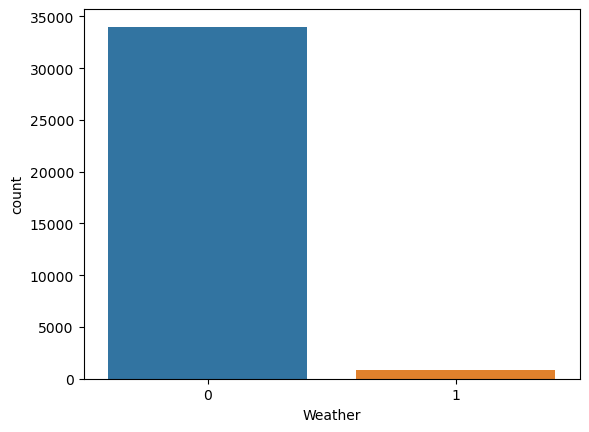

In [71]:
#plt df_sap
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = 'Weather', data = df_sap)
plt.show()